In [ ]:
!pip install mujoco-python-viewer glfw
!pip install mediapy
!pip install ipywidgets
!pip install control

In [1]:
import mujoco 

xml = """
<mujoco>
    <worldbody>
        <geom name="red_box" type="box" size=".2 .2 .2" rgba="1 0 0 1"/>
        <geom name="green_sphere" pos=".2 .2 .2" size=".1" rgba="0 1 0 1"/>
    </worldbody>
</mujoco>
"""

In [2]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

renderer = mujoco.Renderer(model, height=480, width=640)

mujoco.mj_forward(model, data)
renderer.update_scene(data)

frames = renderer.render()

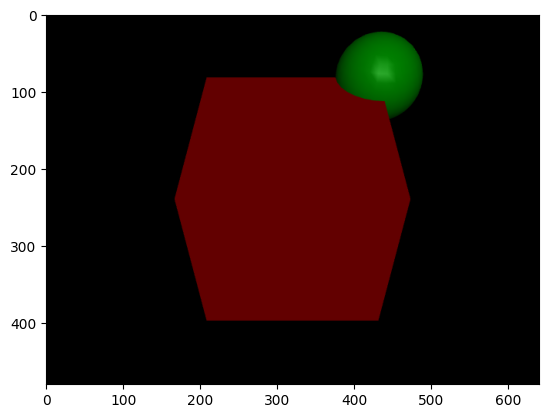

In [3]:
import matplotlib.pyplot as plt

plt.imshow(frames)

In [4]:
print("--- 모델 요약 (Counts) ---")
print(f"Geometries (geom): {model.ngeom}")  # 기하학적 객체 수
print(f"Bodies (body): {model.nbody}")        # 바디(몸체) 수
print(f"Joints (joint): {model.njnt}")         # 관절 수
print(f"Actuators (actuator): {model.nu}")    # 액추에이터(구동기) 수
print(f"Sensors (sensor): {model.nsensor}")      # 센서 수
print(f"Equality constraints: {model.neq}") # 등식 제약 조건 수
print(f"Tendon constraints: {model.ntendon}") # 텐던 수
print(f"Keyframes: {model.nkey}")             # 키프레임 수

--- 모델 요약 (Counts) ---
Geometries (geom): 2
Bodies (body): 1
Joints (joint): 0
Actuators (actuator): 0
Sensors (sensor): 0
Equality constraints: 0
Tendon constraints: 0
Keyframes: 0


In [5]:
# Body 이름 목록
if model.nbody > 0:
    print("Body Names:")
    for i in range(model.nbody):
        print(f"  - {model.body(i).name}") 

Body Names:
  - world


In [6]:
# Geom 이름 목록
if model.ngeom > 0:
    print("Geom Names:")
    for i in range(model.ngeom):
        print(f"  - {model.geom(i).name}")

Geom Names:
  - red_box
  - green_sphere


In [7]:
model.geom('green_sphere')

<_MjModelGeomViews
  bodyid: array([0], dtype=int32)
  conaffinity: array([1], dtype=int32)
  condim: array([3], dtype=int32)
  contype: array([1], dtype=int32)
  dataid: array([-1], dtype=int32)
  friction: array([1.e+00, 5.e-03, 1.e-04])
  gap: array([0.])
  group: array([0], dtype=int32)
  id: 1
  margin: array([0.])
  matid: array([-1], dtype=int32)
  name: 'green_sphere'
  pos: array([0.2, 0.2, 0.2])
  priority: array([0], dtype=int32)
  quat: array([1., 0., 0., 0.])
  rbound: array([0.1])
  rgba: array([0., 1., 0., 1.], dtype=float32)
  sameframe: array([3], dtype=uint8)
  size: array([0.1, 0. , 0. ])
  solimp: array([9.0e-01, 9.5e-01, 1.0e-03, 5.0e-01, 2.0e+00])
  solmix: array([1.])
  solref: array([0.02, 1.  ])
  type: array([2], dtype=int32)
  user: array([], dtype=float64)
>

In [8]:
print('id of "green_sphere": ', model.geom('green_sphere').id)
print('name of geom 1: ', model.geom(1).name)
print('name of body 0: ', model.body(0).name)

id of "green_sphere":  1
name of geom 1:  green_sphere
name of body 0:  world


In [9]:
[model.geom(i).name for i in range(model.ngeom)]

['red_box', 'green_sphere']

In [10]:
model = mujoco.MjModel.from_xml_string(xml)
data = mujoco.MjData(model)

renderer = mujoco.Renderer(model, height=480, width=640)

In [11]:
duration = 5
framerate = 60
frames = []

# MjvCamera
cam = mujoco.MjvCamera()
cam.lookat = [0.1, 0.1, 0.1]
cam.distance = 2.0
cam.elevation = -20

In [12]:
num_frames = duration * framerate
for i in range(num_frames):
    cam.azimuth = 360 * i / num_frames

    mujoco.mj_forward(model, data)
    
    renderer.update_scene(data, camera=cam)

    pixels = renderer.render()
    frames.append(pixels)

In [33]:
from IPython.display import Image, clear_output, display
import cv2

def display_image(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    _, buffer = cv2.imencode('.jpg', frame)
    clear_output(wait=True)
    display(Image(data=buffer, width=500))

In [34]:
len(frames)

300

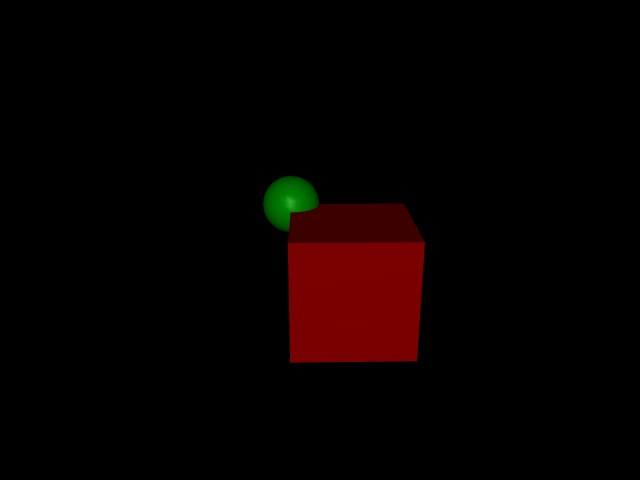

In [36]:
import time 
for frame in frames:
    display_image(frame)
    time.sleep(1/framerate)